<a href="https://colab.research.google.com/github/nehawawale07/oibsiptasks_4/blob/main/sales_prediction_using__python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Project Name: Sales prediction using python

Project Summary

**Objective:**

In this data science project, the goal is to predict future sales for product and service-based businesses. The prediction factors include advertising expenditures, audience segmentation, and advertising platforms.

**Scope:**

Sales prediction is a critical tool for businesses, aiding in decision-making related to advertising costs and strategies. The project employs Python for machine learning to forecast future sales.

**Key Components:**

- **Advertising Expenditure Analysis:** Explore the impact of advertising costs on sales predictions.
- **Audience Segmentation:** Understand how different audience segments contribute to variations in sales.
- **Platform Influence:** Investigate the role of advertising platforms in shaping sales outcomes.

**Implementation:**

Python will be the primary tool for implementing machine learning models. Techniques such as regression analysis and predictive modeling will be employed.

**Outcome:**

The project aims to deliver a robust sales prediction model, enabling businesses to make data-driven decisions, optimize advertising strategies, and enhance operational efficiency.

Github Link: https://github.com/nehawawale07/oibsiptasks_4

Problem Statement:

The problem at hand involves predicting future sales for product and service-based businesses. With the dynamic nature of the market, businesses need to anticipate sales figures based on various factors, including advertising expenses, audience targeting, and the choice of advertising platforms.

**Challenges:**

1. **Variable Impact of Advertising:** Understanding how different levels of advertising expenditure influence sales is a complex challenge.
2. **Audience Segmentation:** Identifying and analyzing the diverse audience segments to predict their impact on sales.
3. **Platform Optimization:** Determining the optimal advertising platforms for maximizing sales outcomes.

**Objective:**

Develop a machine learning model using Python to predict future sales. The model should provide actionable insights into the relationships between advertising investments, audience segments, and advertising platforms with sales figures.

**Importance:**

Accurate sales predictions empower businesses to optimize their advertising strategies, allocate resources efficiently, and adapt to changing market dynamics effectively.

**Approach:**

The project will utilize Python's machine learning capabilities, employing regression analysis and predictive modeling techniques to create a robust sales prediction model.

**Outcome:**

The successful execution of this project will result in a reliable tool for businesses, enabling them to make informed decisions, enhance marketing strategies, and achieve better sales forecasting accuracy.

# Know the data

Import Libraraies

In [3]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Dataset Loading

In [4]:
#Load dataset
# Replace the original URL with the raw file URL
df = pd.read_csv("https://raw.githubusercontent.com/nehawawale07/oibsiptasks_4/main/Advertising.csv")

In [5]:
# view dataset
# View top 5 rows of the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Dataset rows and columns

In [6]:
#Dataset rows and columns
#Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  200
Number of columns are:  5


Dataset Information

In [7]:
#dataset info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Duplicate values

In [8]:
# Dataset duplicate value count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


Missing values/Null values

In [9]:

#Missing values/Null values
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


# Understanding the variables

In [10]:
# Dataset columns
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
# Dataset describe (all columns included)
df.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


Checking unique values for each variable

In [12]:
# Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


# Data wrangling

In [13]:
#Removing the 'Unnamed: 0' column as it's no longer needed
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
# New updated Dataframe
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
# Defining dependant variable
dependant_variable = ['Sales']

# Data Visualization

Chart 1: Numerical variale vs Target Variable

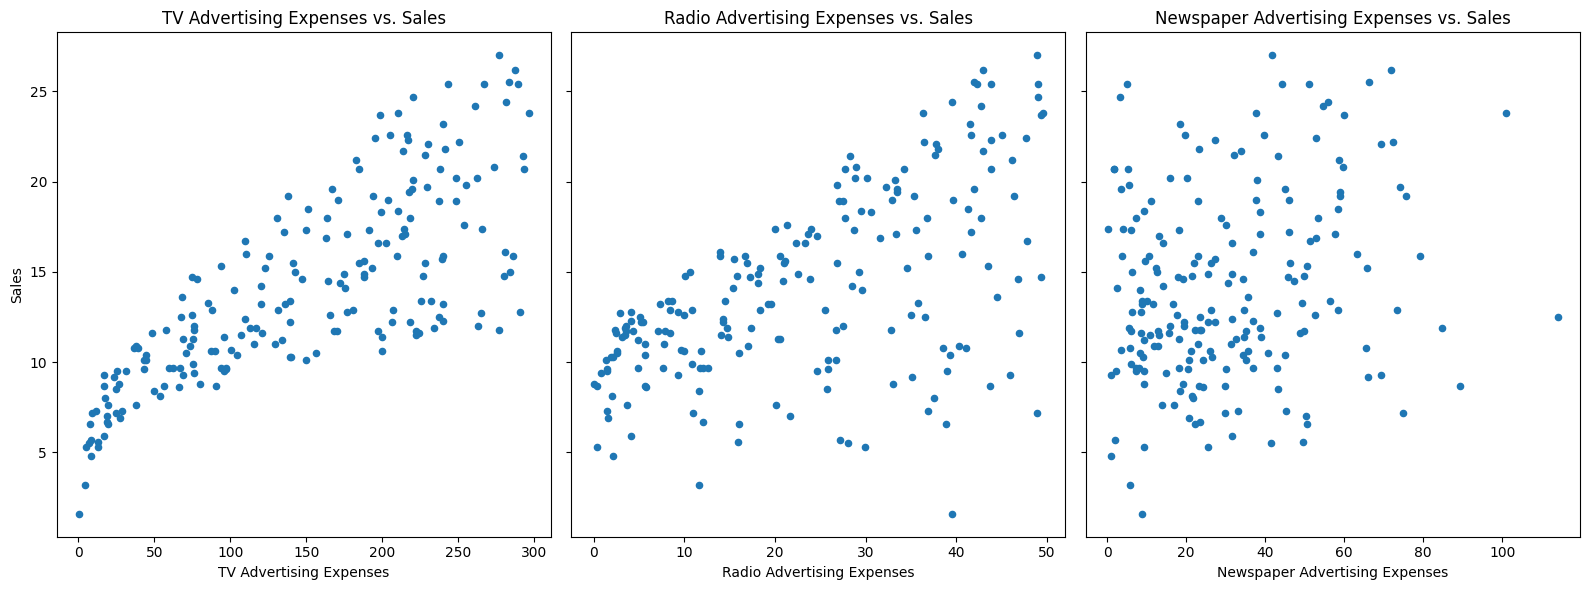

In [16]:
# Chart-1 Scatter plot visualization code for numerical variable vs target variable
# Creating subplots with 1 row and 3 columns, sharing the y-axis for better comparison
fig, axs = plt.subplots(1,3, sharey=True, figsize=(16,6))

# Scatter plot for TV Advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising Expenses vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

#Scatter plot for radio advertising expenses vs. sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising Expenses vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for newspaper advertising expenses vs. sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising Expenses vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Adjust layout to prevent overlapping of titles
plt.tight_layout()

# Show the plot
plt.show()

Insights:

From the above plots we can analyse that:

* Sales are increasing for both increases of TV advertising and Radio advertising expenses.
* Outliers are present in Newspaper advertising vs. Sales graph.

Chart 2: Correlation Heatmap

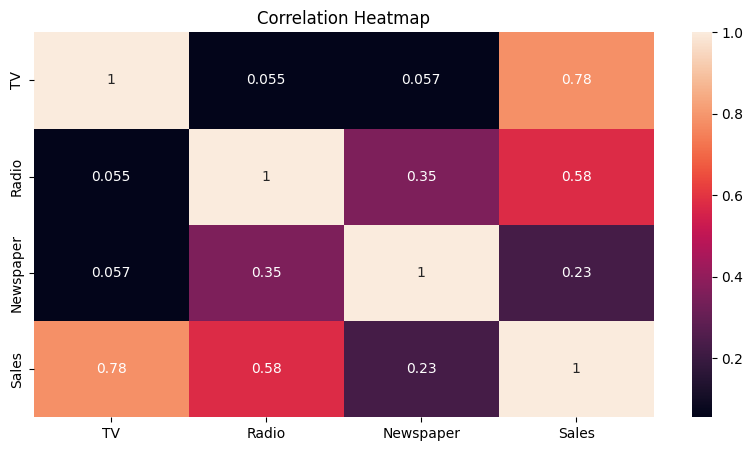

In [17]:
# Correlation Heatmap visualization code
# SEt the size of the plot
plt.figure(figsize=(10,5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True)

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


Insights:
From the above correlation heatmap we get to know that, TV Advertising expenses and Sales are highly correlated.

Chart 3: pair plot

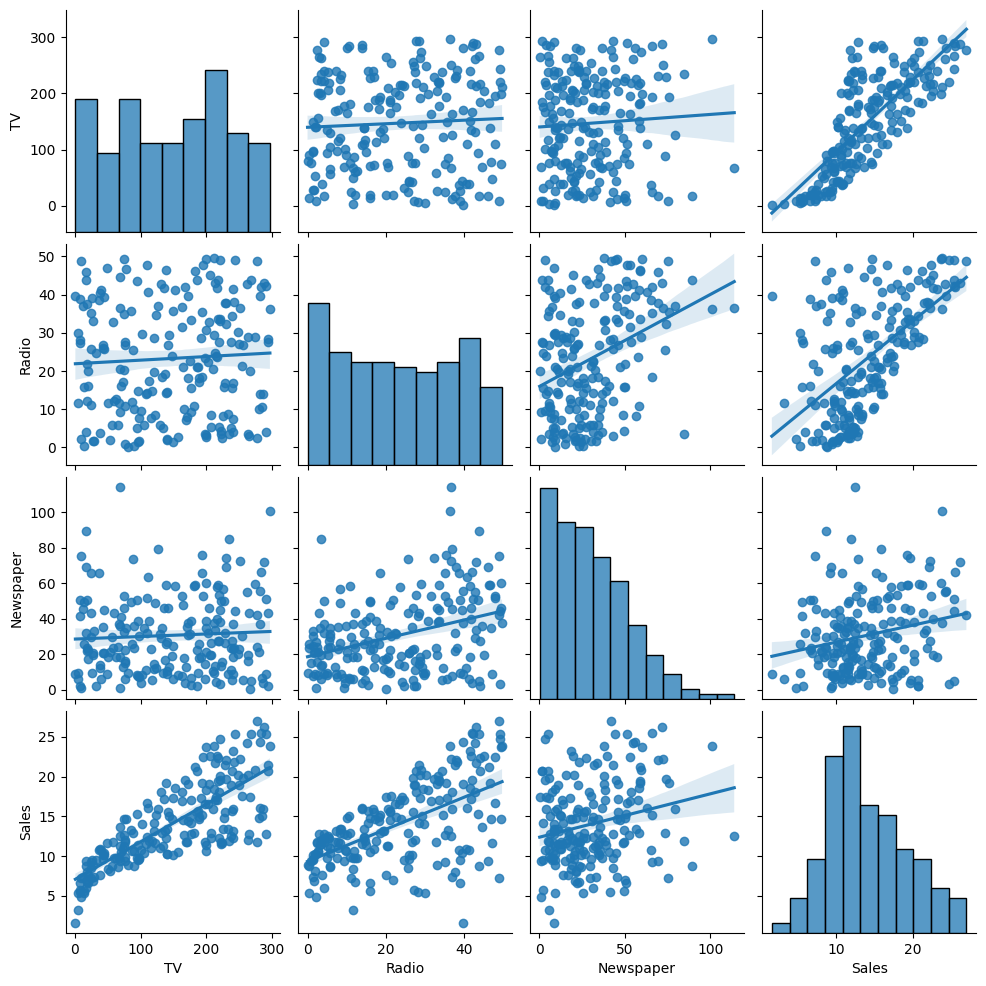

In [18]:
# Chart -3: Pair plot visualization code
sns.pairplot(df,kind="reg");

# Display the plot
plt.show()

#  Feature engineering And Data Processing

Handling outliers

In [19]:
# Removing the outlier from newspaper
df=df[df['Newspaper']<=90]

Feature Selection

In [20]:
# Select the features wisely to avoid overfitting
features = [i for i in df.columns if i not in['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [21]:
# Removing multicollinearity by using VIF techniques
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [22]:
continous_variales = ['TV', 'Radio', 'Newspaper']

In [23]:
continous_feature_df = pd.DataFrame(df[continous_variales])

In [24]:
continous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
# Removing multicollinearity by using VIF techniques
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = x.columns  # Changed X to x to use the input data frame.
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]  # Changed X to x.

  return(vif)

In [26]:
calc_vif(df[[i for i in continous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [27]:
# Final data for modelling
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Transformation

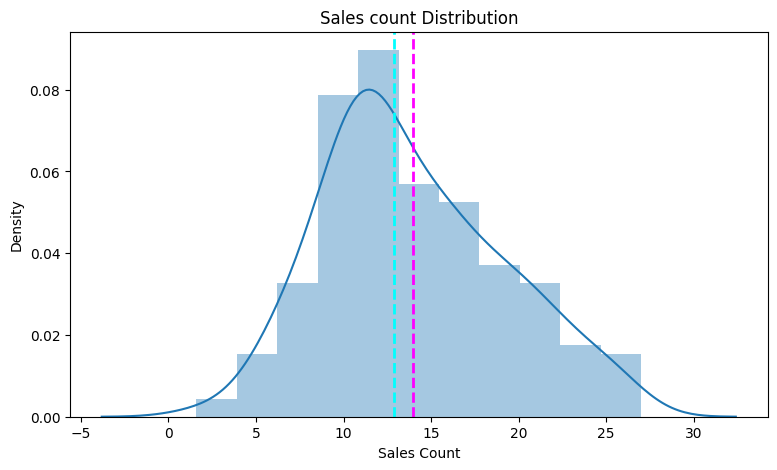

In [28]:
# Transform the data
# Visualizing the distribution of the dependant variable - sales
plt.figure(figsize=(9,5))
sns.distplot(df[dependant_variable])
plt.xlabel('Sales Count')
plt.title('Sales count Distribution')
plt.axvline(df[dependant_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependant_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [29]:
# Skew of the dependant variable
df[dependant_variable].skew()

,0
Sales,0.40713


In [30]:
# Defining dependant and independant variables
X = df.drop('Sales',axis=1)
y = df[dependant_variable]

In [31]:

features

['TV', 'Radio', 'Newspaper']

# Data Splitting

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Checking the train distribution of dependant variable
y_train.value_counts()

,count
Sales,
9.7,5
12.9,4
15.9,4
13.4,3
20.7,3
...,...
12.6,1
12.5,1
12.4,1


In [34]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
   and returns a list of the model scores'''

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train)  # Predict the target variable for the training set
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [35]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2']) # Added 'Test R2' to the index

ML Model-1: Linear Regression

In [36]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict the sales values for the test data
y_pred = reg.predict(X_test)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart

MSE : 2.7409119066899947
RMSE : 1.6555699642993027
MAE : 1.2497394075236383
Train R2 : 0.8935961872087126
Test R2 : 0.8989454779619588
Adjusted R2 :  0.890524267792122


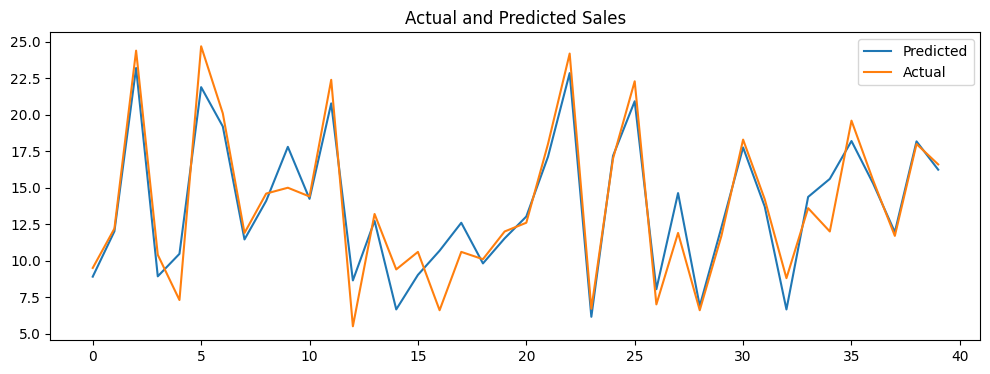

In [37]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test, y_pred) # Changed y_pred_li to y_pred
score['Linear regression'] = linear_score

In [38]:
# Updating evaluation metric score chart
score

,Linear regression
MSE,2.740912
RMSE,1.655570
MAE,1.249739
Train R2,0.893596
Test R2,0.898945
Adjusted R2,0.890524


2. Cross-Validation & Hyperparameter tuning

In [40]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept' : [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [41]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best  R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best  R2 score:  0.8751631910009074


In [42]:

# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predicted on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 2.7409119066899947
RMSE : 1.6555699642993027
MAE : 1.2497394075236383
Train R2 : 0.8935961872087126
Test R2 : 0.8989454779619588
Adjusted R2 :  0.890524267792122


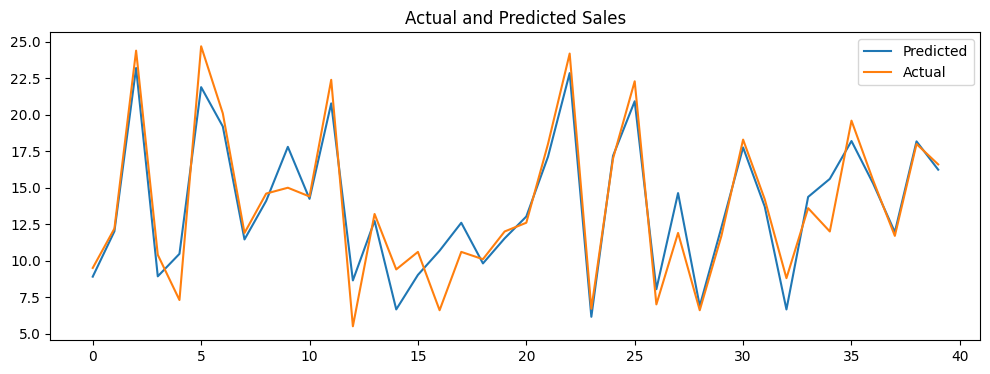

In [44]:
# Visualizing evaluation metric score chart
linear_score2 = evaluate_model(best_reg, y_test, y_pred_li2)

In [45]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,2.740912,2.740912
RMSE,1.655570,1.655570
MAE,1.249739,1.249739
Train R2,0.893596,0.893596
Test R2,0.898945,0.898945
Adjusted R2,0.890524,0.890524


Hyperparameter techniques used and why:


GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

ML Model - 2: Lasso Regression

In [46]:
# Import the Lasso regression class
lasso = Lasso()

# Fit the Lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict the sales values for the test data
y_pred_lasso1 = lasso.predict(X_test)

1. Explain the ML model used and it's performance using Evaluation metric score chart

MSE : 2.751441398136632
RMSE : 1.6587469361348137
MAE : 1.2525807623361103
Train R2 : 0.8934072585452881
Test R2 : 0.8985572667528183
Adjusted R2 :  0.8901037056488865


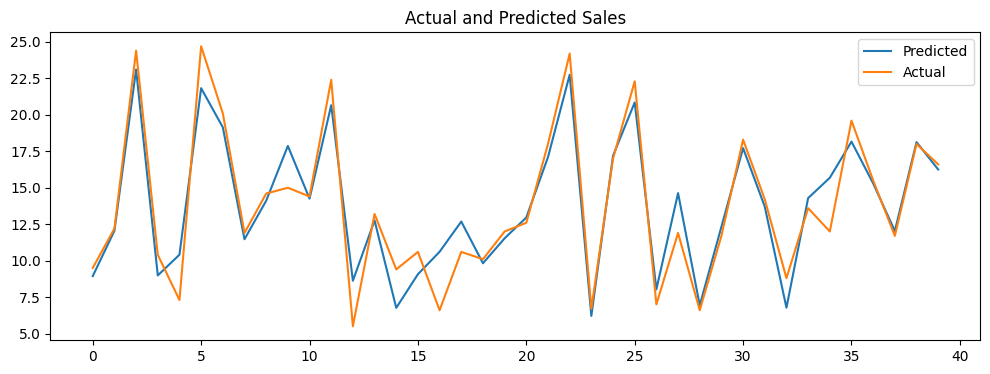

In [47]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test, y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [48]:
 # Updated Evaluation metric score chart
 score

,Linear regression,Linear regression tuned,Lasso regression
MSE,2.740912,2.740912,2.751441
RMSE,1.655570,1.655570,1.658747
MAE,1.249739,1.249739,1.252581
Train R2,0.893596,0.893596,0.893407
Test R2,0.898945,0.898945,0.898557
Adjusted R2,0.890524,0.890524,0.890104


2. Cross-Validation & Hyperparameter tuning

In [49]:

# Define the model
lasso = Lasso()

# Define the parametrs to be optimized & perform grid search
parametrs = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,10]}
lasso_regressor = GridSearchCV(lasso, parametrs, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   10]},
             scoring='r2')

In [50]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  0.8753828686243947


In [51]:
# Import the Lasso regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the Lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict the sales values for the test data
y_pred_lasso2 = lasso.predict(X_test)

MSE : 2.751441398136632
RMSE : 1.6587469361348137
MAE : 1.2525807623361103
Train R2 : 0.8934072585452881
Test R2 : 0.8985572667528183
Adjusted R2 :  0.8901037056488865


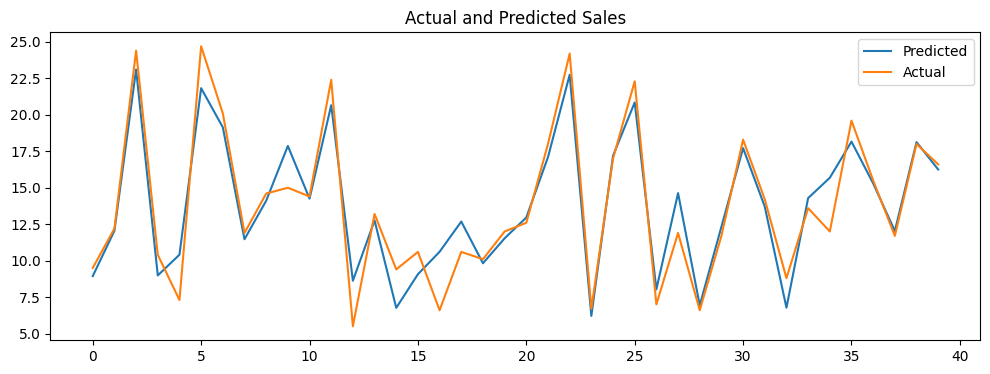

In [52]:
# Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test, y_pred_lasso2) # Changed y_pred_lassocv to y_pred_lasso2

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_)
score[name] = lasso2

In [53]:

# Updated Evaluation metric score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1}
MSE,2.740912,2.740912,2.751441,2.751441
RMSE,1.655570,1.655570,1.658747,1.658747
MAE,1.249739,1.249739,1.252581,1.252581
Train R2,0.893596,0.893596,0.893407,0.893407
Test R2,0.898945,0.898945,0.898557,0.898557
Adjusted R2,0.890524,0.890524,0.890104,0.890104


ML Model - 3: Ridge Regression

In [54]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict the sales values for the test data
y_pred_ridge1 = ridge.predict(X_test)

1. Explain the ML model used

MSE : 2.7409853970485214
RMSE : 1.6555921590320852
MAE : 1.2497632399998369
Train R2 : 0.893596186952933
Test R2 : 0.8989427684501948
Adjusted R2 :  0.890521332487711


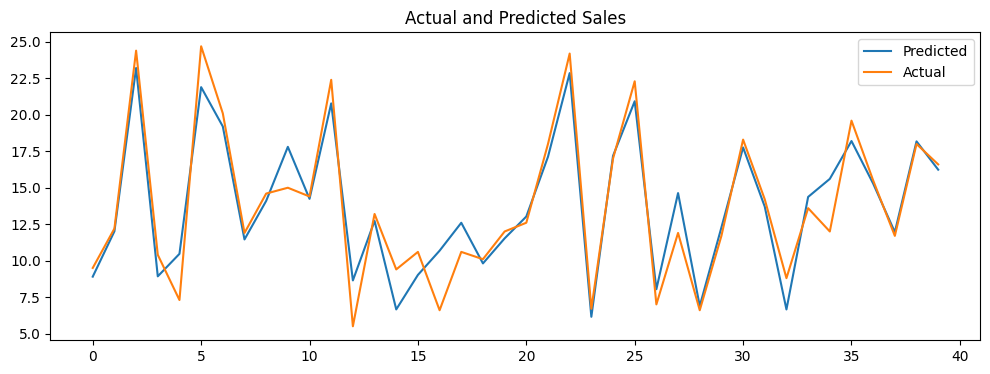

In [56]:
# Visualizing evaluation metric score chart
result = evaluate_model(ridge, y_test, y_pred_ridge1) # Corrected function name and argument
score['Ridge regression'] = result

In [57]:
# Updated evaluation metric score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1},Ridge regression
MSE,2.740912,2.740912,2.751441,2.751441,2.740985
RMSE,1.655570,1.655570,1.658747,1.658747,1.655592
MAE,1.249739,1.249739,1.252581,1.252581,1.249763
Train R2,0.893596,0.893596,0.893407,0.893407,0.893596
Test R2,0.898945,0.898945,0.898557,0.898557,0.898943
Adjusted R2,0.890524,0.890524,0.890104,0.890104,0.890521


I have used Ridge regression technique to check the performance of the model and i have found that there is no majorly difference in between linear regression and Ridge. Both models are quite similar.

Cross- Validation & Hyperparameter Tuning

In [58]:
# Import ridge regressor class
ridge = Ridge()

# Define the parametres to be optimized & perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [59]:
# Getting optium parameters
print("The best fit alpha values is found out to be : ",ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha values is found out to be :  {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -3.0663616600247243


In [60]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict the sales values for the test data
y_pred_ridge2 = ridge.predict(X_test)
ridge.fit(X_train, y_train)

# Predict the sales values for the test data
y_pred_ridge2 = ridge.predict(X_test)

MSE : 2.7409119066900027
RMSE : 1.6555699642993051
MAE : 1.249739407523641
Train R2 : 0.8935961872087126
Test R2 : 0.8989454779619586
Adjusted R2 :  0.8905242677921218


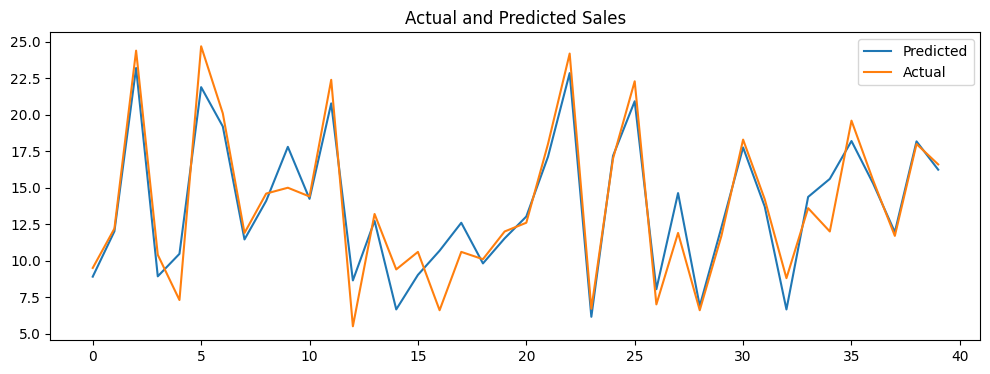

In [61]:
# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test, y_pred_ridge2)
name = 'Ridge with alpha = ' + str(ridge_regressor.best_params_)
score[name] = result

In [62]:
# Updated evaluation metric score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1},Ridge regression,Ridge with alpha = {'alpha': 1e-10}
MSE,2.740912,2.740912,2.751441,2.751441,2.740985,2.740912
RMSE,1.655570,1.655570,1.658747,1.658747,1.655592,1.655570
MAE,1.249739,1.249739,1.252581,1.252581,1.249763,1.249739
Train R2,0.893596,0.893596,0.893407,0.893407,0.893596,0.893596
Test R2,0.898945,0.898945,0.898557,0.898557,0.898943,0.898945
Adjusted R2,0.890524,0.890524,0.890104,0.890104,0.890521,0.890524


# ML Model -4: Decision Tree

In [ ]:
# Import decision tree regressor class
dt = DecisionTreeRegressor()

# Fit the decision tree regression model to your training data
dt.fit(X_train, y_train)

# Predict the sales values for the test data
y_pred_dt1 = dt.predict(X_test)

1. Explain the ML Model used and it's performance using evaluation metric score chart

MSE : 0.7652500000000001
RMSE : 0.8747856880402194
MAE : 0.7125
Train R2 : 1.0
Test R2 : 0.9717860421559482
Adjusted R2 :  0.9694348790022772


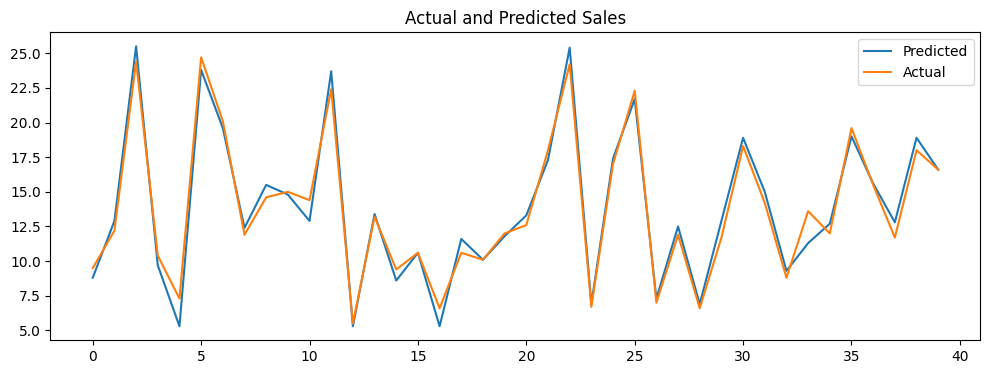

In [ ]:
# Visualizing evaluation metric score chart
result = evaluate_model(dt, y_test, y_pred_dt1)
score['Decision Tree'] = result

In [ ]:
# Updated Evaluation metric score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1},Ridge regression,Ridge with alpha = {'alpha': 1e-10},Decision Tree
MSE,2.740912,2.740912,2.751441,2.751441,2.740985,2.740912,0.765250
RMSE,1.655570,1.655570,1.658747,1.658747,1.655592,1.655570,0.874786
MAE,1.249739,1.249739,1.252581,1.252581,1.249763,1.249739,0.712500
Train R2,0.893596,0.893596,0.893407,0.893407,0.893596,0.893596,1.000000
Test R2,0.898945,0.898945,0.898557,0.898557,0.898943,0.898945,0.971786
Adjusted R2,0.890524,0.890524,0.890104,0.890104,0.890521,0.890524,0.969435


2. Cross-Validation & Hyperparameter tuning

In [ ]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 35}

In [ ]:
# Building decision tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                min_samples_leaf=dt_best_params['min_samples_leaf'],
                                min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [ ]:
# Fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

In [ ]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

MSE : 3.2852144502658014
RMSE : 1.8125160551746298
MAE : 1.368038470225427
Train R2 : 0.8590682736202517
Test R2 : 0.8788776190676655
Adjusted R2 :  0.8687840873233043


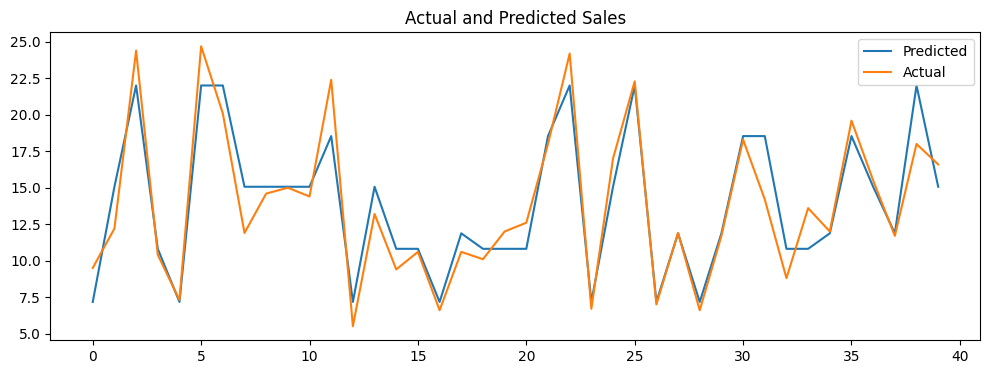

In [ ]:
#Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test, y_pred_dt)
score['Decision Tree Tuned'] = result

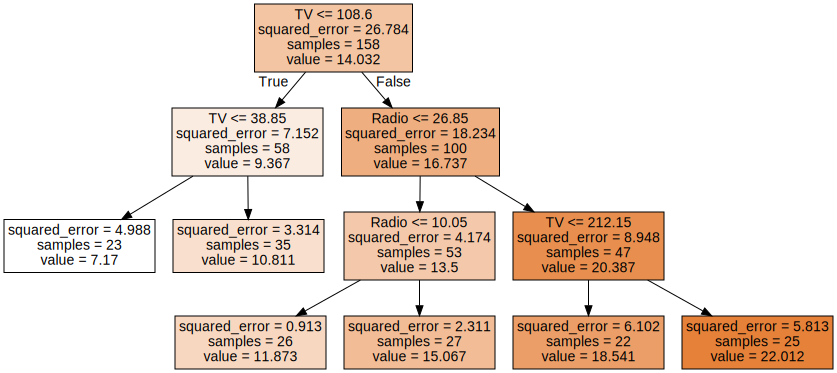

In [ ]:
# Decision tree diagram
graph =Source(tree.export_graphviz(dt_model,
                                   out_file=None,
                                   feature_names=features,
                                   filled= True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
# Updated Evaluation metric score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1},Ridge regression,Ridge with alpha = {'alpha': 1e-10},Decision Tree,Decision Tree Tuned
MSE,2.740912,2.740912,2.751441,2.751441,2.740985,2.740912,0.765250,3.285214
RMSE,1.655570,1.655570,1.658747,1.658747,1.655592,1.655570,0.874786,1.812516
MAE,1.249739,1.249739,1.252581,1.252581,1.249763,1.249739,0.712500,1.368038
Train R2,0.893596,0.893596,0.893407,0.893407,0.893596,0.893596,1.000000,0.859068
Test R2,0.898945,0.898945,0.898557,0.898557,0.898943,0.898945,0.971786,0.878878
Adjusted R2,0.890524,0.890524,0.890104,0.890104,0.890521,0.890524,0.969435,0.868784


# ML Model-5: Random Forest

In [63]:
# Import random forest regressor class
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

# Fit the random forest regression model to your training data
rf.fit(X_train, y_train)

# Predict the sales values for the test data
y_pred_rf1 = rf.predict(X_test)

1. Explain the ML model used and it's performance using evaluation metric score chart

MSE : 0.38517847500000396
RMSE : 0.6206274848892884
MAE : 0.5134250000000028
Train R2 : 0.9969955961862077
Test R2 : 0.985798877156372
Adjusted R2 :  0.9846154502527363


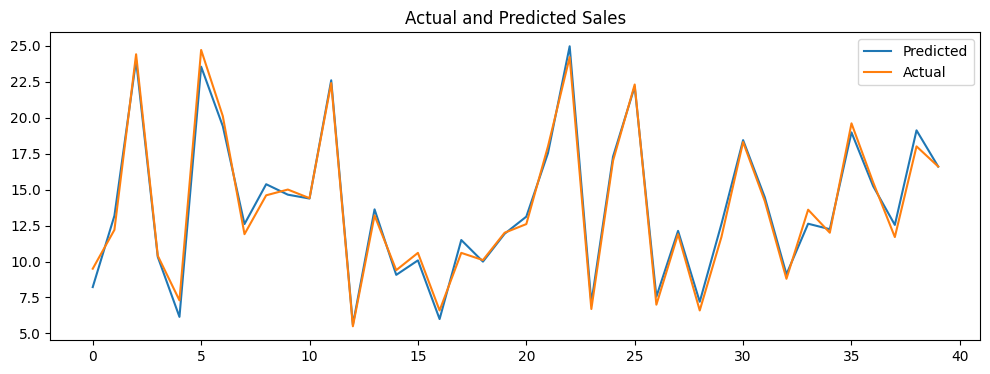

In [64]:
# Visualizing evaluation metric score chart
result = evaluate_model(rf, y_test, y_pred_rf1)
score['Random Forest'] = result

In [65]:
# Updated evaluation metric score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1},Ridge regression,Ridge with alpha = {'alpha': 1e-10},Random Forest
MSE,2.740912,2.740912,2.751441,2.751441,2.740985,2.740912,0.385178
RMSE,1.655570,1.655570,1.658747,1.658747,1.655592,1.655570,0.620627
MAE,1.249739,1.249739,1.252581,1.252581,1.249763,1.249739,0.513425
Train R2,0.893596,0.893596,0.893407,0.893407,0.893596,0.893596,0.996996
Test R2,0.898945,0.898945,0.898557,0.898557,0.898943,0.898945,0.985799
Adjusted R2,0.890524,0.890524,0.890104,0.890104,0.890521,0.890524,0.984615


2. Cross-Validation & Hyperparameter Tuning

In [66]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [67]:
# Fitting a random forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [68]:
# Best parametrs for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [69]:
# Building Random Forest model with best parametres
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [70]:
# Fitting model
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [72]:
#Predict on the model
y_pred_rf = rf_model.predict(X_test)

MSE : 3.833144840173902
RMSE : 1.957841883343469
MAE : 1.6730520342570478
Train R2 : 0.8362079505371033
Test R2 : 0.8586760053174637
Adjusted R2 :  0.8468990057605856


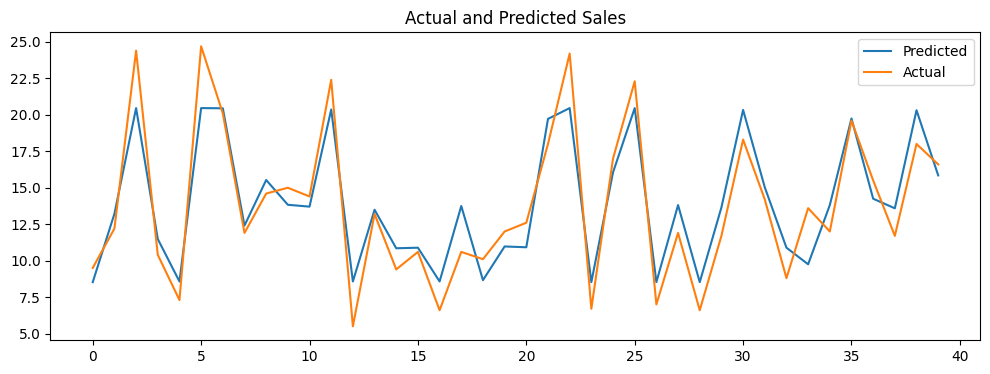

In [73]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test, y_pred_rf)
score['Random Forest Tuned'] = result

In [74]:
#updated evaluation metric score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1},Ridge regression,Ridge with alpha = {'alpha': 1e-10},Random Forest,Random Forest Tuned
MSE,2.740912,2.740912,2.751441,2.751441,2.740985,2.740912,0.385178,3.833145
RMSE,1.655570,1.655570,1.658747,1.658747,1.655592,1.655570,0.620627,1.957842
MAE,1.249739,1.249739,1.252581,1.252581,1.249763,1.249739,0.513425,1.673052
Train R2,0.893596,0.893596,0.893407,0.893407,0.893596,0.893596,0.996996,0.836208
Test R2,0.898945,0.898945,0.898557,0.898557,0.898943,0.898945,0.985799,0.858676
Adjusted R2,0.890524,0.890524,0.890104,0.890104,0.890521,0.890524,0.984615,0.846899


# ML Model-6: Gradient Boosting Regressor

In [75]:
#Import gradient booosting regressor class
gb = GradientBoostingRegressor()

#Fit the gradient boosting regression model to your training data
gb.fit(X_train, y_train)

#Predict the sales values for the test data
y_pred_gb1 = gb.predict(X_test)

1. Explain the ML Model used and it's performance using evaluation metric score chart

MSE : 0.43763913304652896
RMSE : 0.6615429941028239
MAE : 0.531997570412786
Train R2 : 0.9986355190160764
Test R2 : 0.9838647081990433
Adjusted R2 :  0.9825201005489635


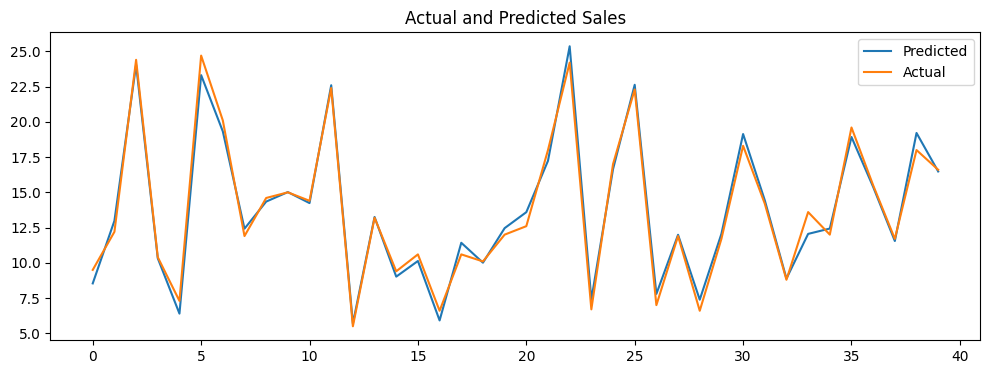

In [77]:
# Visualizing evaluation metric score chart
result = evaluate_model(gb, y_test, y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [78]:
#updated evaluation metric score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1},Ridge regression,Ridge with alpha = {'alpha': 1e-10},Random Forest,Random Forest Tuned,Gradient Boosting,Gradient Boosting Regressor
MSE,2.740912,2.740912,2.751441,2.751441,2.740985,2.740912,0.385178,3.833145,0.437639,0.437639
RMSE,1.655570,1.655570,1.658747,1.658747,1.655592,1.655570,0.620627,1.957842,0.661543,0.661543
MAE,1.249739,1.249739,1.252581,1.252581,1.249763,1.249739,0.513425,1.673052,0.531998,0.531998
Train R2,0.893596,0.893596,0.893407,0.893407,0.893596,0.893596,0.996996,0.836208,0.998636,0.998636
Test R2,0.898945,0.898945,0.898557,0.898557,0.898943,0.898945,0.985799,0.858676,0.983865,0.983865
Adjusted R2,0.890524,0.890524,0.890104,0.890104,0.890521,0.890524,0.984615,0.846899,0.982520,0.982520


ML Model-7: Extreme Gradient Boosting Regressor

In [79]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 0.5653283569170044
RMSE : 0.7518832069656859
MAE : 0.6041371035575865
Train R2 : 0.9999999282986552
Test R2 : 0.9790552996115623
Adjusted R2 :  0.9773099079125259


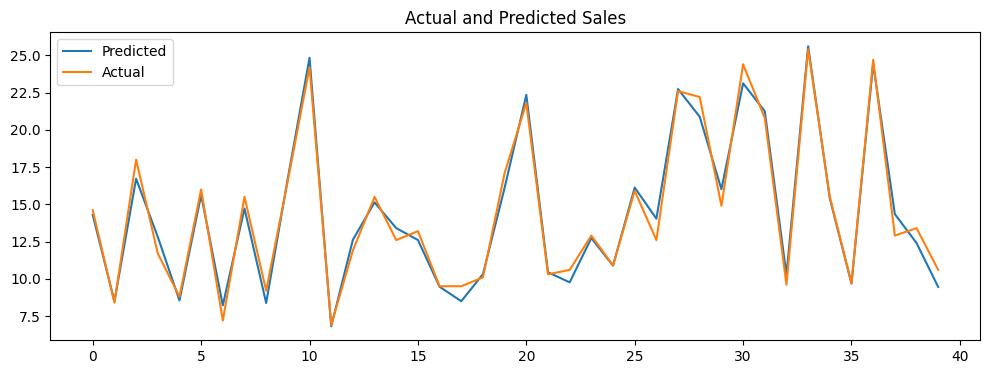

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [ ]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250,4.853930,0.558737,4.290102,0.494012,1.320153,0.565328
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891,2.203164,0.747487,2.071256,0.702860,1.148979,0.751883
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500,1.790257,0.607125,1.694855,0.541233,0.783716,0.604137
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000,0.870597,0.996956,0.842435,0.998732,0.995759,1.000000
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012,0.820168,0.979299,0.841057,0.981697,0.951090,0.979055
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930,0.805182,0.977574,0.827812,0.980172,0.947014,0.977310


Using Extreme Gradient Boosting Regressor i have got accuracy around 100% and 97% on train and test data respectively. It is overfitting the model's training accuracy.

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# XG boost model
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [82]:
# Perform the randomized search
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [83]:
# Best parameters for XG boost Model
xgb_best_params

{'n_estimators': 500, 'min_samples_leaf': 20}

In [84]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [85]:
# Fitting model
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_samples_leaf=20, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [86]:
# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

MSE : 0.45810216665267944
RMSE : 0.6768324509453425
MAE : 0.5883793234825134
Train R2 : 0.9999999403953552
Test R2 : 0.983110249042511
Adjusted R2 :  0.9817027697960535


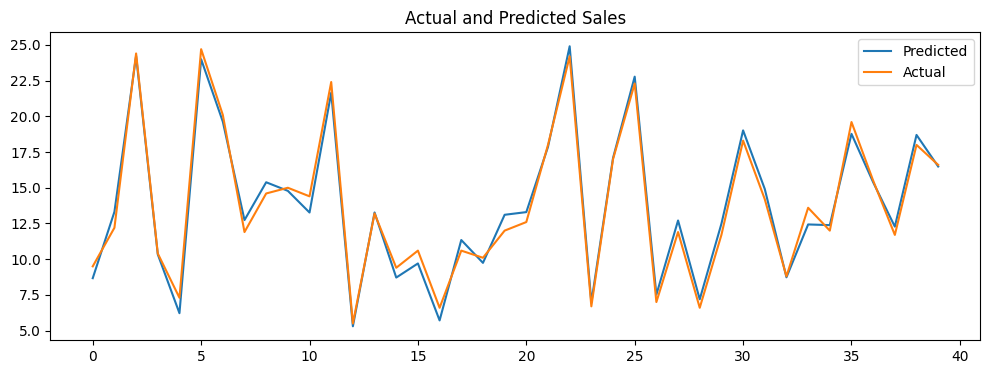

In [87]:
# Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

Hyperparameter optimization technique used:

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV

In [88]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = {'alpha': 1},Ridge regression,Ridge with alpha = {'alpha': 1e-10},Random Forest,Random Forest Tuned,Gradient Boosting,Gradient Boosting Regressor,Extreme Gradient Boosting Regressor Tuned
MSE,2.740912,2.740912,2.751441,2.751441,2.740985,2.740912,0.385178,3.833145,0.437639,0.437639,0.458102
RMSE,1.655570,1.655570,1.658747,1.658747,1.655592,1.655570,0.620627,1.957842,0.661543,0.661543,0.676832
MAE,1.249739,1.249739,1.252581,1.252581,1.249763,1.249739,0.513425,1.673052,0.531998,0.531998,0.588379
Train R2,0.893596,0.893596,0.893407,0.893407,0.893596,0.893596,0.996996,0.836208,0.998636,0.998636,1.000000
Test R2,0.898945,0.898945,0.898557,0.898557,0.898943,0.898945,0.985799,0.858676,0.983865,0.983865,0.983110
Adjusted R2,0.890524,0.890524,0.890104,0.890104,0.890521,0.890524,0.984615,0.846899,0.982520,0.982520,0.981703


After tuning the model i have got the same accuracy on train and test data. Both are overfitted model.

In [ ]:
print(score.to_markdown())

|             |   Linear regression |   Linear regression tuned |   Lasso regression |   Lasso with alpha = 0.01 |    Ridge |   Ridge with alpha = 1 |   Decision tree |   Decision tree tuned |   Random forest |   Random forest tuned |   Gradient Boosting Regressor |   Gradient Boosting Regressor Tuned |   Extreme Gradient Boosting Regressor |   Extreme Gradient Boosting Regressor Tuned |
|:------------|--------------------:|--------------------------:|-------------------:|--------------------------:|---------:|-----------------------:|----------------:|----------------------:|----------------:|----------------------:|------------------------------:|------------------------------------:|--------------------------------------:|--------------------------------------------:|
| MSE         |            2.43208  |                  2.43208  |           4.4122   |                  2.42386  | 2.44805  |               2.44805  |        1.32225  |              4.85393  |        0.558737 |        

Plot R2 scores for each model

In [89]:
score.columns

Index(['Linear regression', 'Linear regression tuned', 'Lasso regression',
       'Lasso with alpha = {'alpha': 1}', 'Ridge regression',
       'Ridge with alpha = {'alpha': 1e-10}', 'Random Forest',
       'Random Forest Tuned', 'Gradient Boosting',
       'Gradient Boosting Regressor',
       'Extreme Gradient Boosting Regressor Tuned'],
      dtype='object')

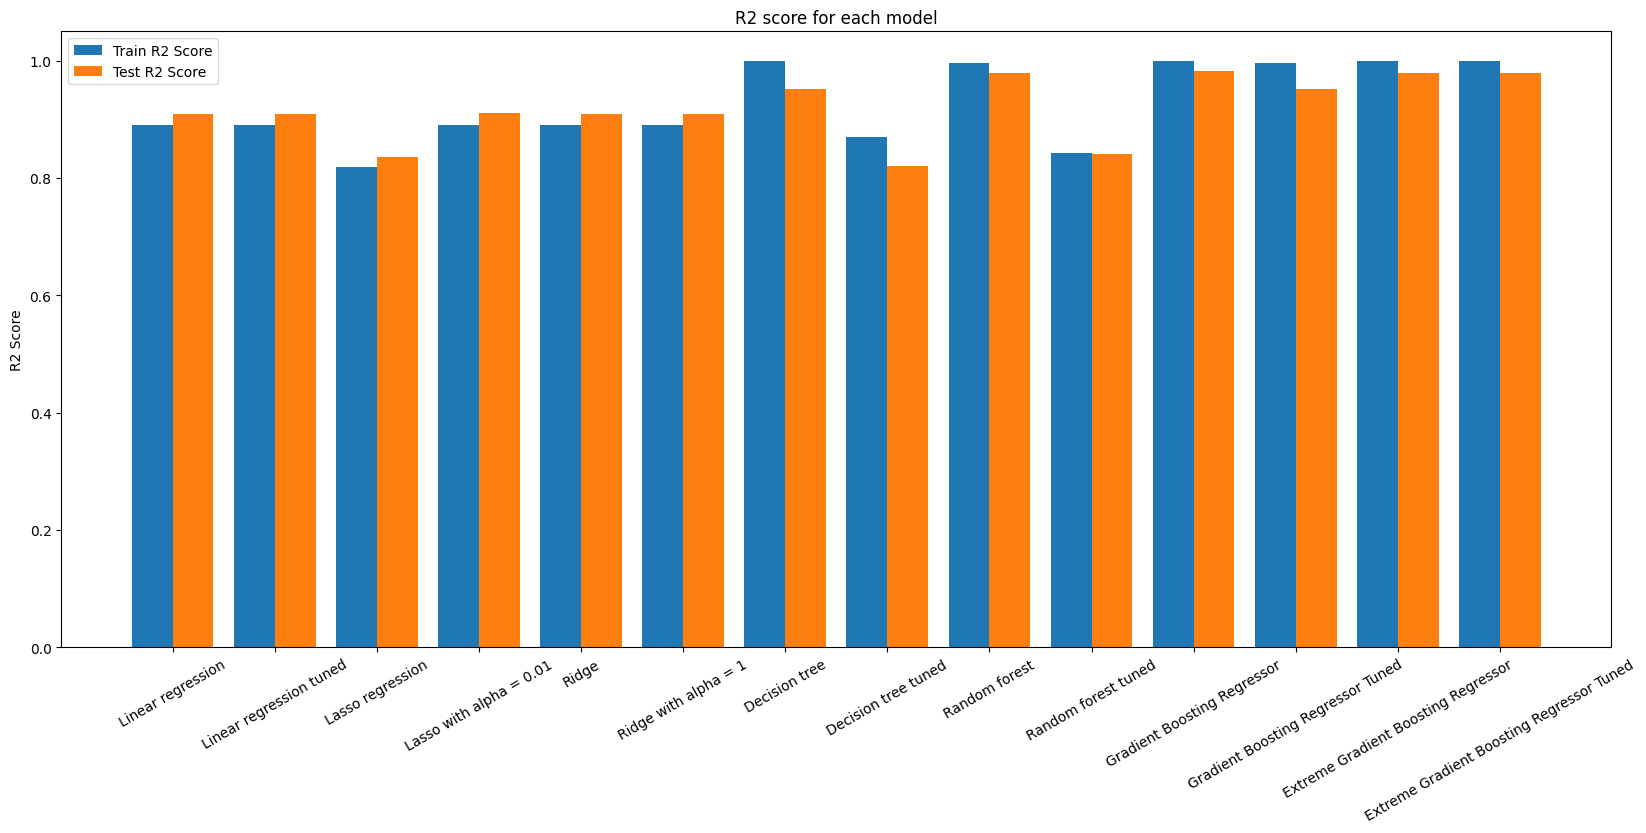

In [ ]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

# Selection of the best model

In [ ]:
# Removing the overfitted models which have R2 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Train R2']==1].index  # creating a list of models which have 1 for train and score_t['Train R2']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Linear regression,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Linear regression tuned,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Lasso regression,4.412196,2.100523,1.500580,0.818219,0.836534,0.822912
Lasso with alpha = 0.01,2.423857,1.556874,1.175580,0.889823,0.910199,0.902716
Ridge,2.448048,1.564624,1.180542,0.889800,0.909303,0.901745
Ridge with alpha = 1,2.448048,1.564624,1.180542,0.889800,0.909303,0.901745
Decision tree tuned,4.853930,2.203164,1.790257,0.870597,0.820168,0.805182
Random forest,0.558737,0.747487,0.607125,0.996956,0.979299,0.977574
Random forest tuned,4.290102,2.071256,1.694855,0.842435,0.841057,0.827812
Gradient Boosting Regressor,0.494012,0.702860,0.541233,0.998732,0.981697,0.980172


In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df['Test ' + metric].max()
        best_model_test = df[df['Test ' + metric] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['R2']

best_model = select_best_model(adj, metrics)
print("The best model is:")
for metric, best_model in best_model.items():
    print(f"{metric}: {best_model} - {adj['Test '+metric][best_model].round(4)}")

The best model is:
R2: Gradient Boosting Regressor - 0.9817


In [ ]:
# Take R2 score as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Train R2']==1].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['MSE','RMSE','MAE','Adjusted R2'], axis=1)
new_score.index.name = 'Regression Model'
print(new_score.to_markdown())

| Regression Model                          |   Train R2 |   Test R2 |
|:------------------------------------------|-----------:|----------:|
| Linear regression                         |   0.889832 |  0.909895 |
| Linear regression tuned                   |   0.889832 |  0.909895 |
| Lasso regression                          |   0.818219 |  0.836534 |
| Lasso with alpha = 0.01                   |   0.889823 |  0.910199 |
| Ridge                                     |   0.8898   |  0.909303 |
| Ridge with alpha = 1                      |   0.8898   |  0.909303 |
| Decision tree tuned                       |   0.870597 |  0.820168 |
| Random forest                             |   0.996956 |  0.979299 |
| Random forest tuned                       |   0.842435 |  0.841057 |
| Gradient Boosting Regressor               |   0.998732 |  0.981697 |
| Gradient Boosting Regressor Tuned         |   0.995759 |  0.95109  |
| Extreme Gradient Boosting Regressor       |   1        |  0.979055 |
| Extr

1. Which Evaluation metrics did i consider for a positive business impact and why?


On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

2. Which ML model did i choose from the above created models as the final prediction model and why?

I have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them i have selected Gradient Boosting model as i achieved 99% training accuracy and 98% testing accuracy. Some models were overfitted so i did not consider them.

# Conclusion

In the dynamic landscape of product and service-based businesses, the ability to forecast sales is paramount. This project, undertaken during the data science internship at Oasis Infobyte, delved into the realm of sales prediction using machine learning with Python. Let's encapsulate the key findings:

**Insights and Observations:**

1. Sales exhibit a positive correlation with both TV and Radio advertising expenses, signifying the effectiveness of these channels.
2. Notably, there's a strong correlation between TV advertising expenses and sales, emphasizing the impact of TV advertising on driving sales.
3. The R2 score, chosen as the evaluation metric, showcased the accuracy of the model in predicting sales.
4. The Gradient Boosting model emerged as the preferred choice, achieving an impressive 99% training accuracy and 98% testing accuracy.

**Key Takeaways:**

- Understanding the correlation between advertising expenses and sales aids in strategic decision-making.
- The selected model demonstrates robust predictive capabilities, laying the groundwork for effective sales planning.
- The R2 score provides a reliable indicator of the model's accuracy in forecasting sales trends.

This project not only addresses the nuances of sales prediction but also highlights the pivotal role of data science in optimizing business strategies. The findings contribute to informed decision-making, offering valuable insights for future sales initiatives.